## Introduction
Les données sont issues de "The Meteoritical Society". Elles regroupent quelques caracteristiques des astéorides tombés sur terre. Sa masse, la position géographique, son nom, etc.

L'objectif principal de ce projet est d'apprendre à manipuler les librairies les plus utilisées pour les data-sciences en python (pandas, numpy, matplotlib, sklearn). L'intêret des graphiques et des valeurs est donc secondaire. 

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn import preprocessing
from mpl_toolkits.basemap import Basemap

df = pd.read_csv('meteorite-landings.csv')

In [2]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.100000, 71.800000)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.833330, 95.166670)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.216670, 0.616670)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.600000, -65.233330)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.866670, -64.550000)"


In [3]:
df["fall"] = df.fall.map({'Fell': 1, 'Found': 0}).astype(int)
df["nametype"] = df.nametype.map({'Valid': 1, 'Relict': 0}).astype(int)

In [4]:
le = preprocessing.LabelEncoder()
le.fit(df.recclass)
df['recclass'] = le.transform(df.recclass)

In [5]:
df.describe()

,id,nametype,recclass,mass,fall,year,reclat,reclong
count,45716.000000,45716.000000,45716.000000,4.558500e+04,45716.000000,45428.000000,38401.000000,38401.000000
mean,26889.735104,0.998359,256.459423,1.327808e+04,0.024215,1991.772189,-39.122580,61.074319
std,16860.683030,0.040471,97.995230,5.749889e+05,0.153717,27.181247,46.378511,80.647298
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,301.000000,-87.366670,-165.433330
25%,12688.750000,1.000000,184.000000,7.200000e+00,0.000000,1987.000000,-76.714240,0.000000
50%,24261.500000,1.000000,276.000000,3.260000e+01,0.000000,1998.000000,-71.500000,35.666670
75%,40656.750000,1.000000,333.000000,2.026000e+02,0.000000,2003.000000,0.000000,157.166670
max,57458.000000,1.000000,465.000000,6.000000e+07,1.000000,2501.000000,81.166670,354.473330


## Espace

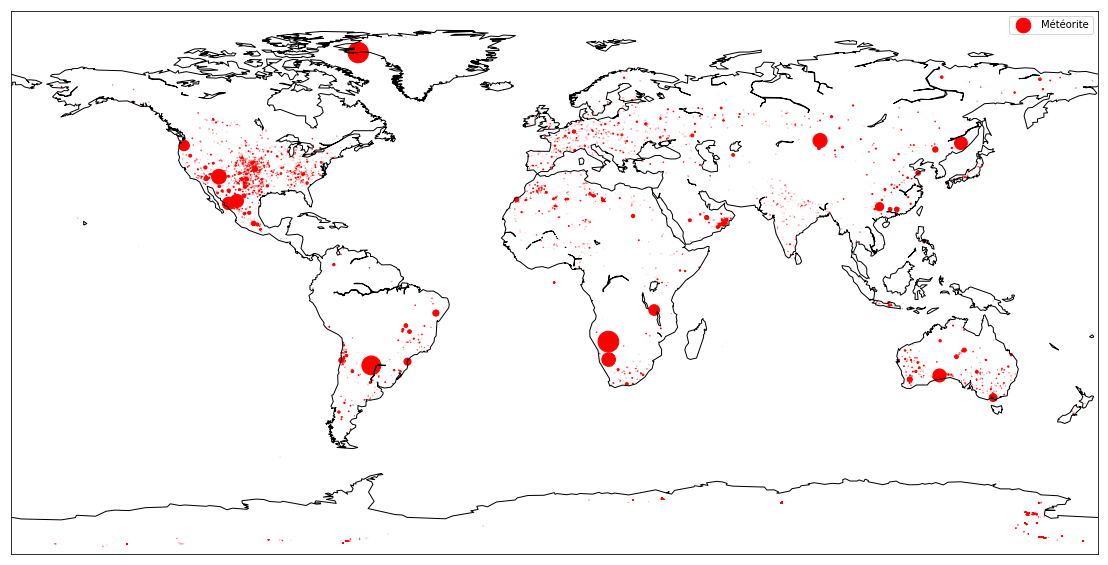

In [20]:
plt.figure(figsize=(20,10))

m = Basemap(lat_0=0, lon_0=0)
meteoritepoint = df['mass'].apply(lambda x:x/140000)
m.scatter(df.reclong, df.reclat, meteoritepoint, color="red", label="Météorite")
m.drawcoastlines(linewidth=1)
plt.legend()
plt.show()

In [7]:
df.loc[df.name == "Agen"]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
7,Agen,392,1,184,30000.0,1,1814.0,44.21667,0.61667,"(44.216670, 0.616670)"


![asteroideX.png](attachment:asteroideX.png)

## Temps

In [8]:
deviation = df.year.std()
mean = df.year.mean()
dico = {"68%":1, "95%":2, "99,7%":3}

for key, value in dico.items():
    start = mean - value * deviation
    end = mean + value * deviation
    print(key+ " des valeurs sont entre "+str(int(start))+" et "+str(int(end)))


68% des valeurs sont entre 1964 et 2018
95% des valeurs sont entre 1937 et 2046
99,7% des valeurs sont entre 1910 et 2073


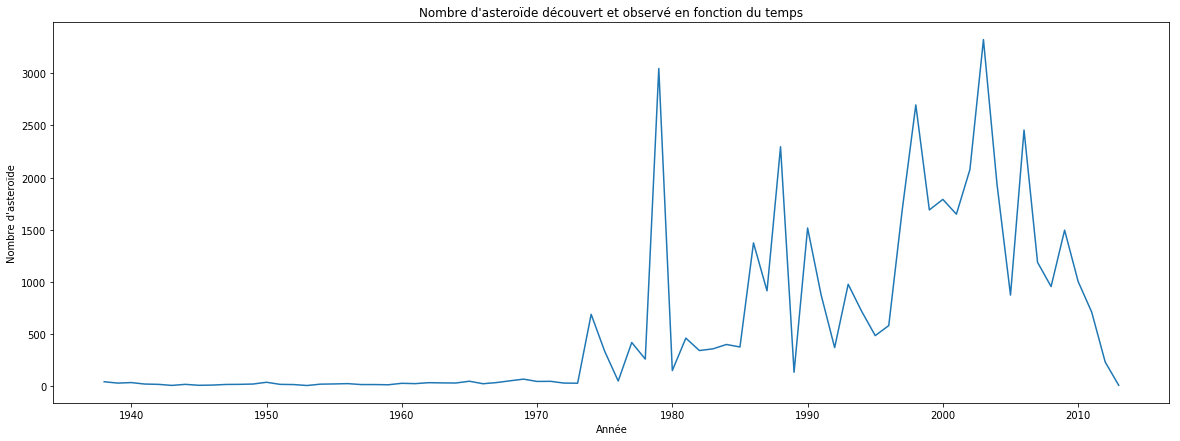

In [9]:
plt.figure(figsize=(20,7))
df.loc[(df.year > 1937) & (df.year < 2046)].groupby("year").count().id.plot()
plt.xlabel("Année")
plt.ylabel("Nombre d'asteroïde")
plt.title("Nombre d'asteroïde découvert et observé en fonction du temps")
plt.show()

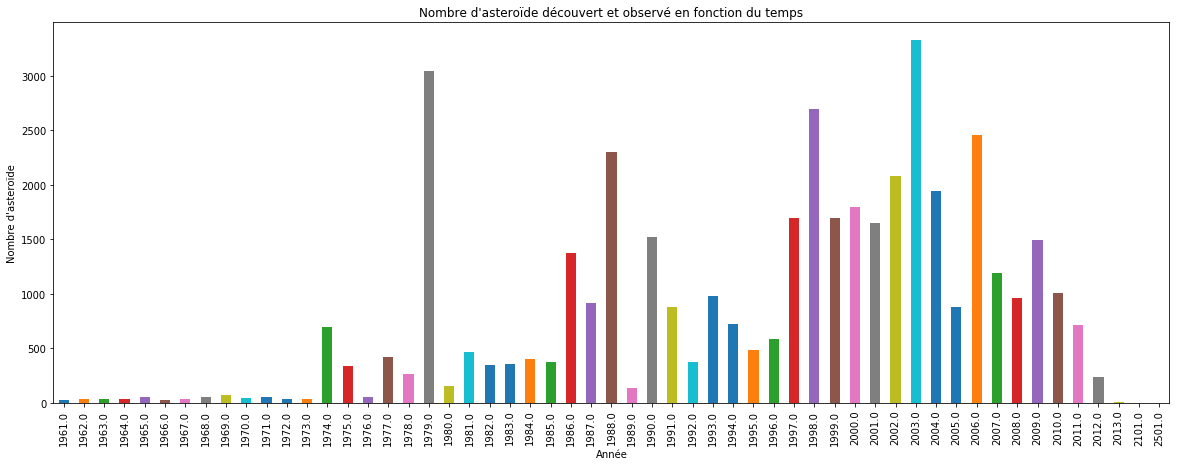

In [10]:
plt.figure(figsize=(20,7))

groupyear = df.loc[df.year > 1960].groupby('year')
groupyear.id.count().plot.bar()
plt.xlabel("Année")
plt.ylabel("Nombre d'asteroïde")
plt.title("Nombre d'asteroïde découvert et observé en fonction du temps")

plt.show()

In [11]:
print("Nombre d'asteroïdes decouverts : "+str(df.loc[df.fall == 0,"id"].count()))
print("Nombre d'asteroïdes observés : "+str(df.loc[df.fall == 1,"id"].count()))

Nombre d'asteroïdes decouverts : 44609
Nombre d'asteroïdes observés : 1107


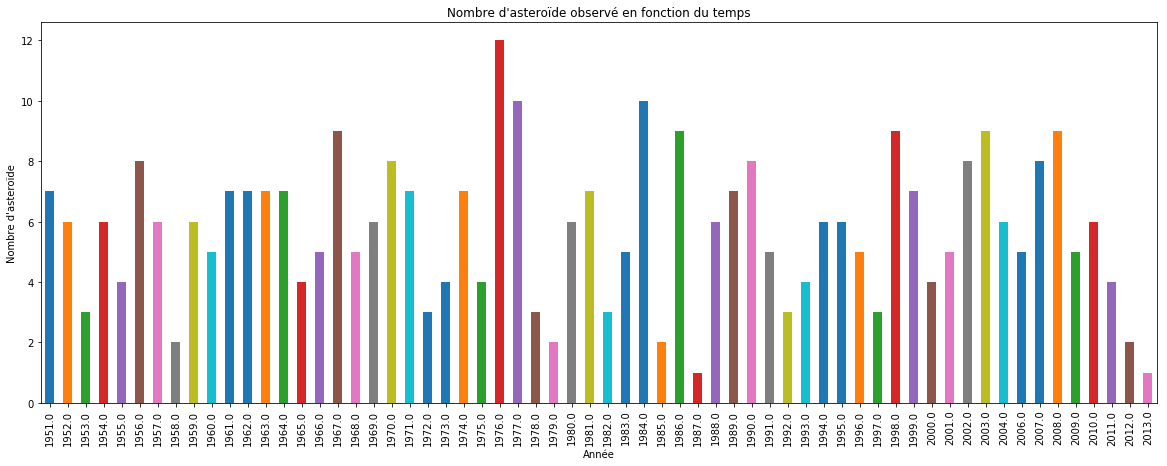

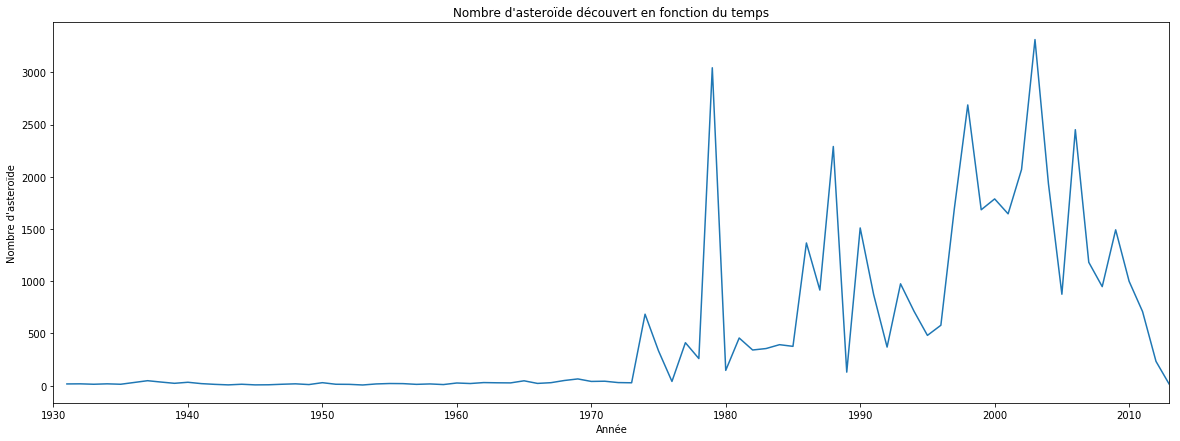

In [28]:
plt.figure(figsize=(20,7))

groupyear = df.loc[(df.year > 1950) & (df.fall == 1)].groupby('year')
groupyear.fall.count().plot.bar()
plt.xlabel("Année")
plt.ylabel("Nombre d'asteroïde")
plt.title("Nombre d'asteroïde observé en fonction du temps")

plt.show()

plt.figure(figsize=(20,7))

groupyear = df.loc[(df.year > 1930) & (df.fall == 0)].groupby('year')
groupyear.fall.count().plot()
plt.xlim(1930, 2013)
plt.xlabel("Année")
plt.ylabel("Nombre d'asteroïde")
plt.title("Nombre d'asteroïde découvert en fonction du temps")
plt.show()

## Caractéristiques

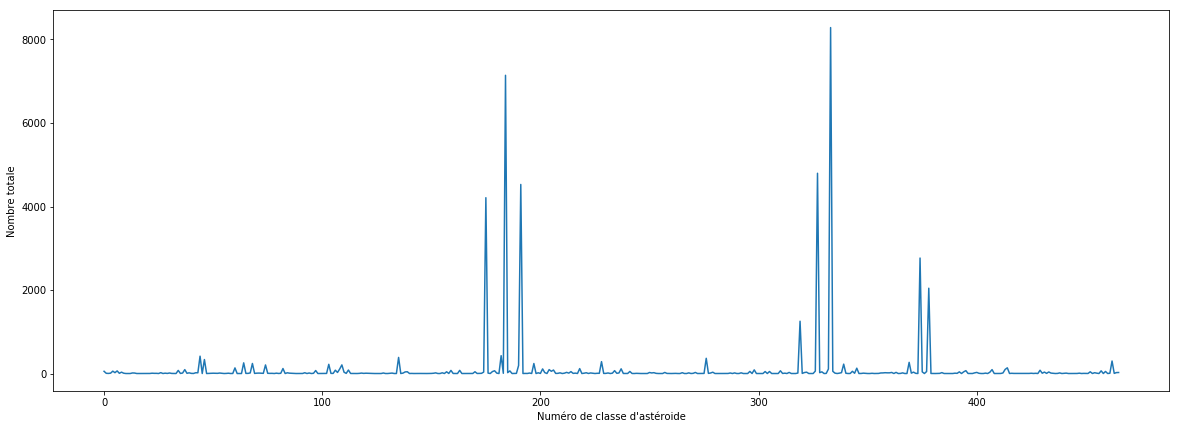

In [13]:
plt.figure(figsize=(20,7))

gbRecclass = df.groupby(df['recclass'])
gbRecclass.recclass.count().plot()
plt.xlabel("Numéro de classe d'astéroide")
plt.ylabel("Nombre totale")
plt.show()

Nombre totale d'asteroïde selon leurs classe encodée :

In [14]:
topRecclass = gbRecclass.recclass.count().apply(lambda x : x if x > 1000 else None)
topRecclass.dropna(inplace=True)
topRecclass.sort_values(ascending=True, inplace=True)
topRecclass

recclass
319    1253.0
378    2043.0
374    2766.0
175    4211.0
191    4528.0
327    4796.0
184    7142.0
333    8285.0
Name: recclass, dtype: float64

Classement des classes decodées selon le nombre d'asteroïde :

In [15]:
le.inverse_transform(topRecclass.axes).tolist()[0]

/usr/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['L4', 'LL6', 'LL5', 'H4', 'H6', 'L5', 'H5', 'L6']

Pourcentage de la sommes des asteroïdes appartenants à une classe :

In [16]:
round(topRecclass / df.recclass.count(), 3)

recclass
319    0.027
378    0.045
374    0.061
175    0.092
191    0.099
327    0.105
184    0.156
333    0.181
Name: recclass, dtype: float64

In [17]:
valid = df.loc[df.nametype == 0]
relict = df.loc[df.nametype == 1]
print("Nombre total d'astéroide intacte "+str(valid.id.count()))
print("Nombre total d'astéroide degradé "+str(relict.id.count()))

Nombre total d'astéroide intacte 75
Nombre total d'astéroide degradé 45641
